In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("consegne-vaccini.csv", sep=",")

In [2]:
print(df.head())  # Mostra le prime righe
print(df.info())  # Informazioni sulle colonne


  area             forn  numero_dosi data_consegna   N1    N2  ISTAT      reg
0  ABR  Pfizer/BioNTech          135    2020-12-27  ITF  ITF1     13  Abruzzo
1  ABR  Pfizer/BioNTech         7800    2020-12-30  ITF  ITF1     13  Abruzzo
2  ABR  Pfizer/BioNTech         3900    2021-01-05  ITF  ITF1     13  Abruzzo
3  ABR  Pfizer/BioNTech         3900    2021-01-07  ITF  ITF1     13  Abruzzo
4  ABR  Pfizer/BioNTech         3900    2021-01-11  ITF  ITF1     13  Abruzzo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7690 entries, 0 to 7689
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           7690 non-null   object
 1   forn           7690 non-null   object
 2   numero_dosi    7690 non-null   int64 
 3   data_consegna  7690 non-null   object
 4   N1             7690 non-null   object
 5   N2             7690 non-null   object
 6   ISTAT          7690 non-null   int64 
 7   reg            7690 non-null   obj

In [3]:
df = df.loc [:, ["area", "forn", "numero_dosi", "data_consegna", "reg"]]
df = df.sort_values (by="data_consegna")

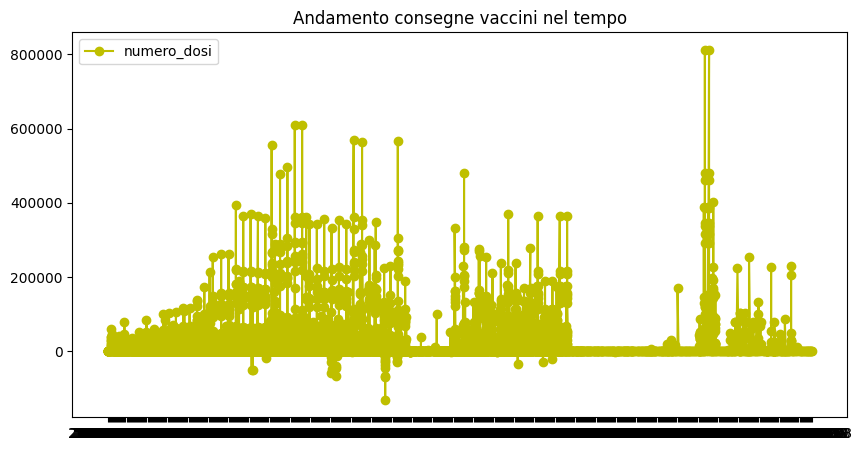

In [5]:

plt.figure(figsize=(10,5)) #PER GESTIRE LE MISURE DELLA FIGURA 
plt.plot(df["data_consegna"], df["numero_dosi"], marker="o", linestyle="-", color="y", label="numero_dosi")
plt.title("Andamento consegne vaccini nel tempo") #posso inserire il testo del grafico 
plt.legend()
plt.show()

In [7]:
print("Totale dosi consegnate:", df["numero_dosi"].sum())

Totale dosi consegnate: 159922147


In [8]:
print("Media giornaliera delle dosi:", df["numero_dosi"].mean())


Media giornaliera delle dosi: 20796.117945383616


In [9]:
print(df.loc[df["numero_dosi"].idxmax()])


area                         LOM
forn             Pfizer/BioNTech
numero_dosi               812160
data_consegna         2022-09-07
reg                    Lombardia
Name: 4502, dtype: object


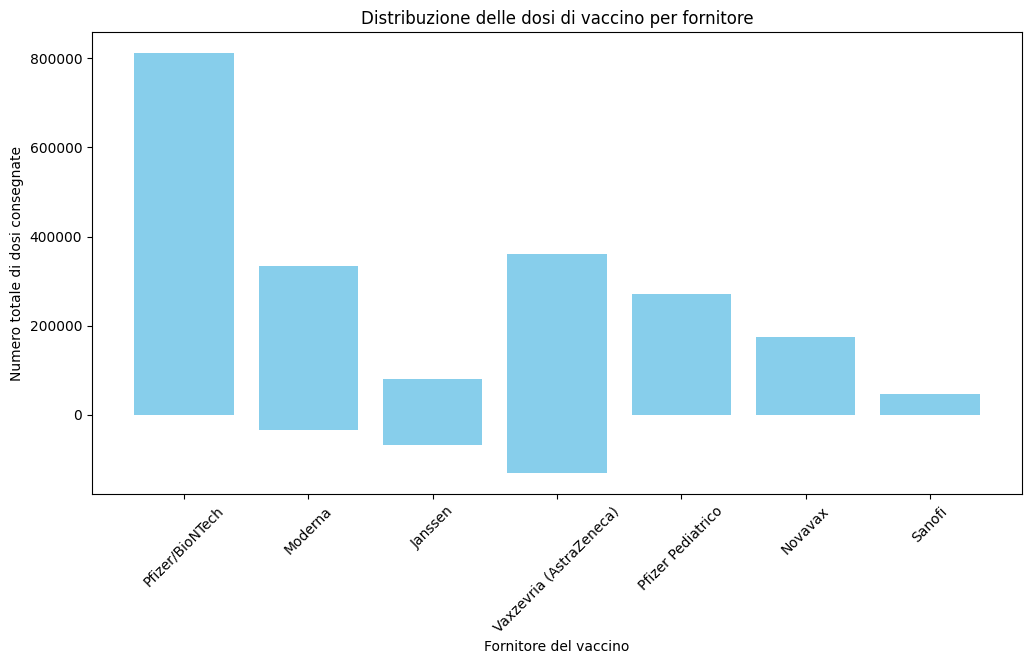

In [10]:
# Crea il grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(df["forn"], df["numero_dosi"], color="skyblue")

# Etichette e titolo
plt.xlabel("Fornitore del vaccino")
plt.ylabel("Numero totale di dosi consegnate")
plt.title("Distribuzione delle dosi di vaccino per fornitore")
plt.xticks(rotation=45)  # Ruota i nomi per leggibilità

# Mostra il grafico
plt.show()

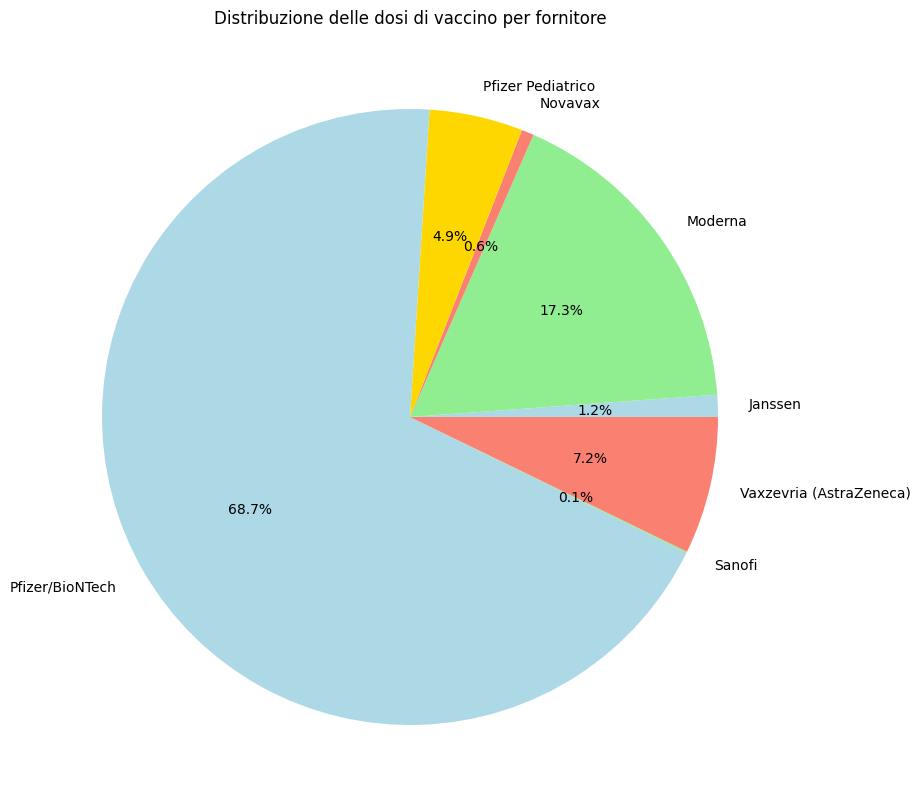

In [17]:

# Raggruppa i dati per fornitore e somma le dosi
df_grouped = df.groupby("forn")["numero_dosi"].sum()

# Crea il grafico a torta
plt.figure(figsize=(10, 10))
plt.pie(df_grouped, labels=df_grouped.index, autopct="%1.1f%%", colors=["lightblue", "lightgreen", "salmon", "gold"])

# Titolo
plt.title("Distribuzione delle dosi di vaccino per fornitore")

# Mostra il grafico
plt.show()
